# Visualizing FordGoBike Data
## By Mohammed Albluwi

## Investigation Overview:<br />

In this Ford Go Bike Data Analysis, We want to look at what affects the biking system's usage. This leads us to investigate several features that we think have relationships with our investigation. These interesting features are ages, gender user typer, time, and locations.

## About Dataset: <br />

The data consists of approximately 2,619,577 records for public bike rides from Jun 2017 to September 2018 and from Jan 2019 to the end of Feb 2019. 9936 records were removed as they are null data. There were no duplicate rows and what we found was duplicate indexes as a result of merging several data frames. The data consists of 16 features, and we added 16 more features, which are calculated or split from the 16 features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
#import wptools
#import tweepy
import os
import re
import requests
from PIL import Image
from io import BytesIO
#from tweepy import OAuthHandler
import json
#from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_goBike_clean =pd.read_csv("df_goBike_clean.csv")

C:\Users\mac14\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## The usage of FordGoBike by Month <br />

The summer months are the most popular times to use the Ford GoBikes. In October, the usage drops more than a half of the summer season and continues in low usage until April, spring season.

Text(0.5, 1, 'Bike Usage by month')

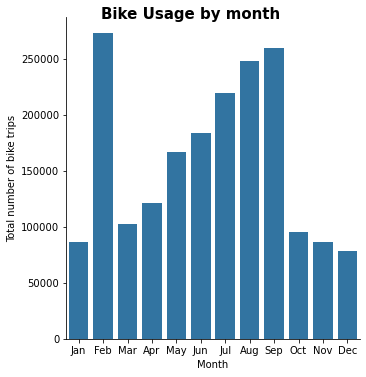

In [33]:
import calendar
#plt.figure(figsize=[ 11.69, 8.27])
base_color = sb.color_palette()[0]
df_goBike_temp = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_temp['Start_Month'] = df_goBike_temp['Start_Month'].apply(lambda x: calendar.month_abbr[x])

#plot it
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
g = sns.catplot(data = df_goBike_temp,x='Start_Month',kind='count',color=base_color , order=months)
g.set_axis_labels('Month','Total number of bike trips')
g.fig.suptitle('Bike Usage by month', y=1,fontsize=15, fontweight='bold')

## Bizzare Analysis! <br />

The usage of the bikes is unnormal high in February 2019 compared to the same month in 2017 and 2108. There is something happening out of our data, so we are unable to explain it.

Text(0.5, 1.0, 'The riding in 2017-2018')

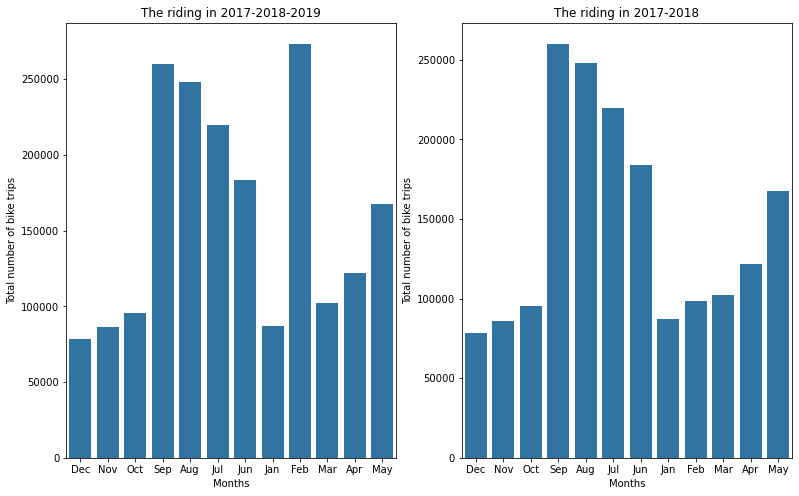

In [34]:
#plt.figure(figsize=[ 11.69, 8.27])
# make a copy
df_goBike_clean_copy = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_clean_copy['Start_Month'] = df_goBike_clean_copy['Start_Month'].apply(lambda x: calendar.month_abbr[x])

# filter by year
df_goBike_2018_2017 = df_goBike_clean_copy.query('Start_Year !=2019')


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize = [13, 8])
plt.subplot(1, 2, 1) 
sb.countplot(data=df_goBike_clean_copy, x='Start_Month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bike trips")
plt.title("The riding in 2017-2018-2019")

plt.subplot(1, 2, 2) 
sb.countplot(data=df_goBike_2018_2017, x='Start_Month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bike trips")
plt.title("The riding in 2017-2018")

## The usage of FordGoBike by weekdays <br />

The FordGoBike usage is mainly used during the weekdays. The most popular days are Tuesday to Thursday, and Friday and Monday are almost the same in the number of rides. The number drops largely about a half on Saturday and Sunday, indicating that mainly use of FordGoBike is on working days.

Text(0.5, 1, 'Bike Usage by weekdays')

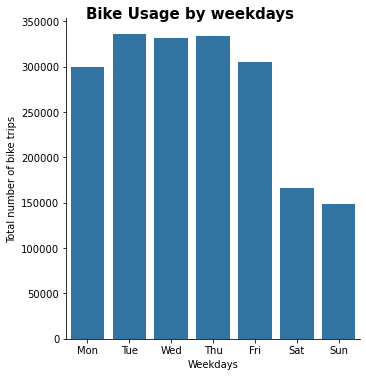

In [35]:
#plt.figure(figsize=[ 11.69, 8.27])
df_goBike_temp = df_goBike_clean.copy()

# convert the months numbers to months names
df_goBike_temp['Start_Day_of_Week'] = df_goBike_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
#order=weekdays
#plot it
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
g = sns.catplot(data = df_goBike_temp,x='Start_Day_of_Week',kind='count',color=base_color, order = weekdays)
g.set_axis_labels('Weekdays','Total number of bike trips')
g.fig.suptitle('Bike Usage by weekdays', y=1,fontsize=15, fontweight='bold')

### The usage of Bike by Age <br />

About 72% of riders are male and 23% for female. The remaining is the other genders.

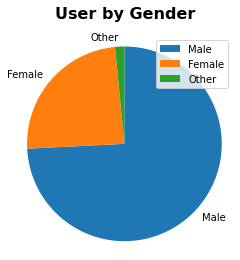

In [36]:
# Use the same pokemon dataset
sorted_counts = df_goBike_clean['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 
# Though, you can use either one specified here - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axis.html?highlight=pyplot%20axis#matplotlib-pyplot-axis
plt.axis('square')
plt.title('User by Gender', y=1.05, fontsize=16, fontweight='bold');
plt.legend()

## Top 10 Stations with the most trips in San Francisco <br />

1. San Francisco Caltrain Station 2  (Townsend St at 4th St)
2. San Francisco Caltrain (Townsend St at 4th St)
3. San Francisco Ferry Building (Harry Bridges Plaza)
4. Market St at 10th St
5. Berry St at 4th St
6. Montgomery St BART Station (Market St at 2nd St)
7. The Embarcadero at Sansome St
8. Powell St BART Station (Market St at 4th St)
9. Howard St at Beale St
10. Steuart St at Market St


In [3]:
# Subset the dataset by keeping only top 10 locations 
locs = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
        'San Francisco Caltrain (Townsend St at 4th St)',
        'San Francisco Ferry Building (Harry Bridges Plaza)',
        'Market St at 10th St',
        'Berry St at 4th St',
        'Montgomery St BART Station (Market St at 2nd St)',
        'The Embarcadero at Sansome St',
        'Powell St BART Station (Market St at 4th St)',
        'Howard St at Beale St',
        'Steuart St at Market St',]
        
df_locations_Top10 = df_goBike_clean.loc[df_goBike_clean['start_station_name'].isin(locs)]

In [5]:
# get index for ordreing the bins in the plot
stations = df_locations_Top10['start_station_name'].value_counts() 
order = stations.index

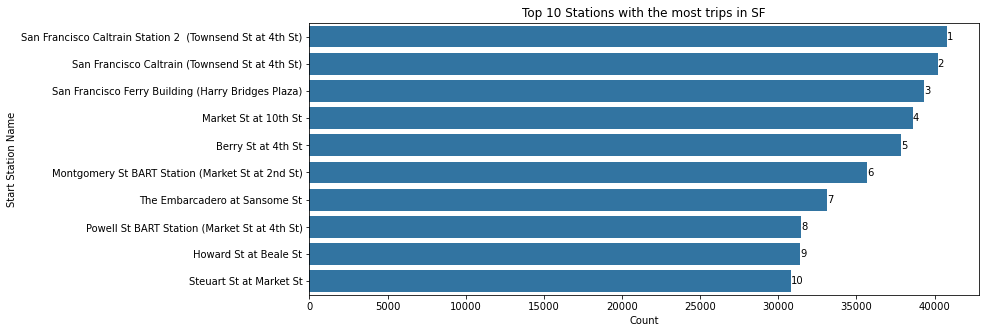

In [6]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=df_locations_Top10, y='start_station_name', color=base_color, order = order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Top 10 Stations with the most trips in SF');

index = 0
for i in locs:
    #pct_string = '{:0.1f}'.format(df_goBike_clean[df_goBike_clean['start_station_name'] == i].count()[0])
    c = df_goBike_clean[df_goBike_clean['start_station_name'] == i].count()[0]
    plt.text(c+1, index, index + 1, va='center')
    index = index + 1
    

## The user type proportion for the FordGoBike system <br />

Subscribers represent 88% in terms of system users. The rest is the occasional riders.

In [40]:
# calculate the customer and subscriber proportions
customer = df_goBike_clean[df_goBike_clean.user_type == "Customer"]['bike_id'].count()
subscriber = df_goBike_clean[df_goBike_clean.user_type ==  "Subscriber"]['bike_id'].count()


customer_prop = customer / df_goBike_clean['bike_id'].count()
subscriber_prop = subscriber / df_goBike_clean['bike_id'].count()

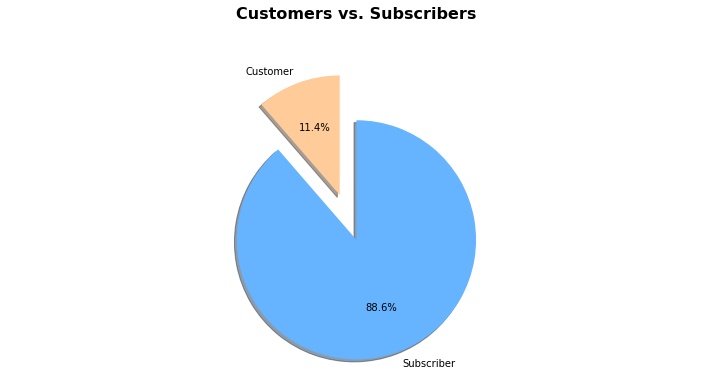

In [41]:
plt.figure(figsize=[10,5])

labels = ['Customer','Subscriber']
sizes = [customer_prop,subscriber_prop]
explode = (0,0.4)
colors = ['#ffcc99','#66b3ff']

plt.pie(sizes,explode=explode,labels=labels,colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')
plt.suptitle('Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
plt.tight_layout()

## The weekley usage of bikes per user type <br />

In general, customers have clearly a low usage of the bikes in terms of user type. However, customers seem to be more active on the weekend compared to subscribers.

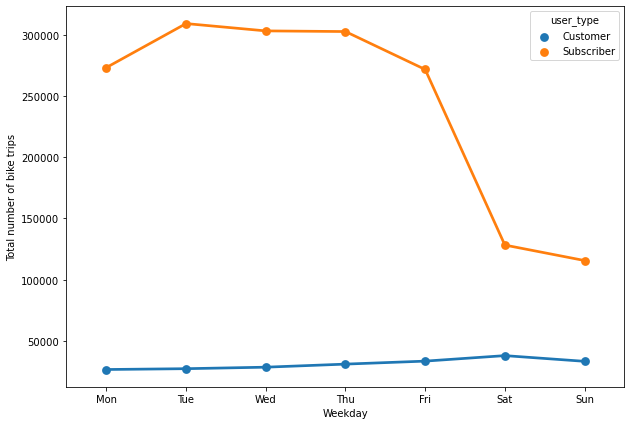

In [42]:
plt.figure(figsize=(10, 7))

df_user_week = df_goBike_clean.groupby(['Start_Day_of_Week', 'user_type']).size().reset_index()
df_user_week['Start_Day_of_Week'] = df_user_week['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']


sb.pointplot(data=df_user_week , x='Start_Day_of_Week',y=0, hue='user_type', order = weekdays)
plt.xlabel('Weekday')
plt.ylabel('Total number of bike trips');

## How about trip duration per user type? <br />

Interestingly, trip durations for customers are longer than subscribers. Customers usually takes and subscriber 8-22 minutes and subscribers are about 7-14 minutes.

Text(0, 0.5, 'Duration in Minute')

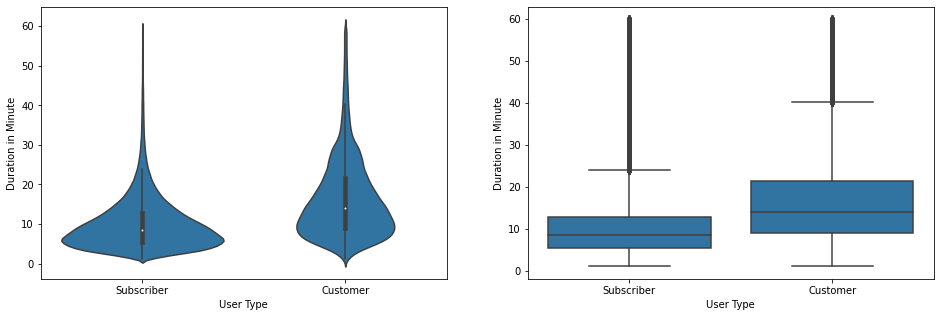

In [43]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

df_temp= df_goBike_clean.query('duration_min < 60')

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_temp, x='user_type', y='duration_min', color=base_color, innner='quartile')
#plt.xticks(rotation=15);
plt.xlabel("User Type")
plt.ylabel("Duration in Minute")
# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_temp, x='user_type', y='duration_min', color=base_color)
plt.xlabel("User Type")
plt.ylabel("Duration in Minute")
#plt.xticks(rotation=15);
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

 ## Riding count based on user typer and member gender on top 10 Stations <br />
 
In general, male subscribers are more by far female customers in all stations. However, the amount of the same gender shows variety among stations

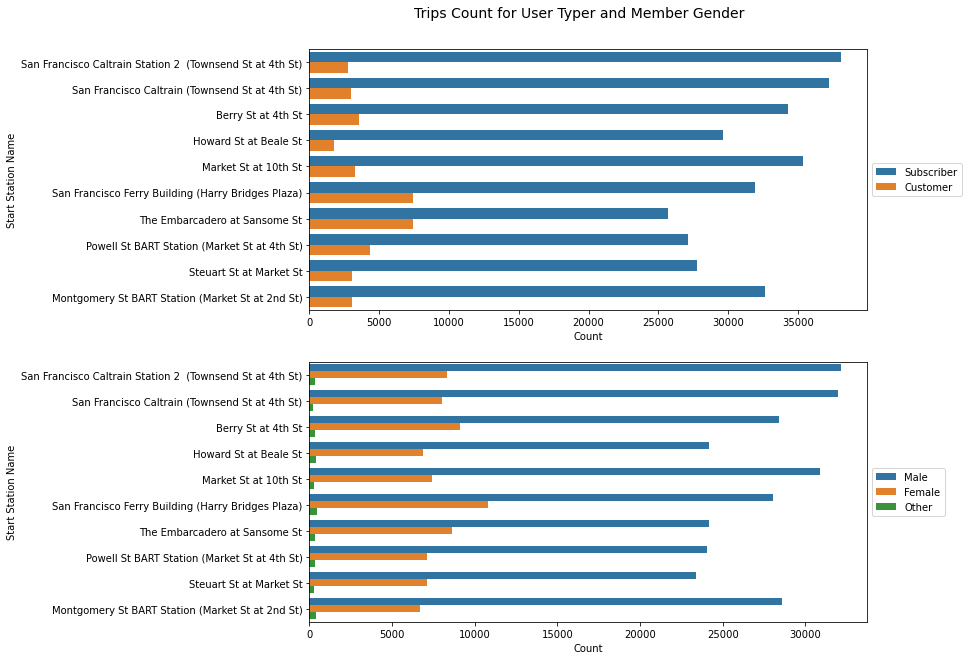

In [44]:
# 3. Categorical variables by plotting countplot: top 8 stations by users' attributes (user_type, member's gender)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top=0.92)
users = ['user_type','member_gender']
fig.suptitle('Trips Count for User Typer and Member Gender', fontsize=14)
for i in range(1, 3):
    ax = fig.add_subplot(2, 1, i)
    sb.countplot(data=df_locations_Top10, y='start_station_name', hue=users[i-1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.ylabel('Start Station Name')
    plt.xlabel('Count');

## Weekly Usage as per gender and user typer <br />

The trends of males and females are similar, which males are more riding than male. For customers, the demand increases on weekends, while it decreases for subscribers

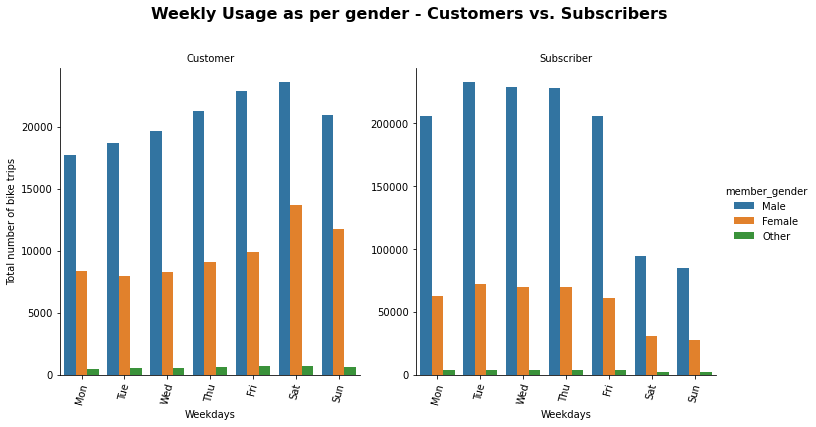

In [45]:
df_goBike_temp = df_goBike_clean.copy()
df_goBike_temp['Start_Day_of_Week'] = df_goBike_temp['Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

v = sns.catplot(data=df_goBike_temp, x='Start_Day_of_Week', 
                col='user_type', hue='member_gender', sharey=False, kind='count', order=weekdays)

v.set_axis_labels('Weekdays','Total number of bike trips')
v.set_titles("{col_name}")
plt.suptitle('Weekly Usage as per gender - Customers vs. Subscribers', y=1.1, fontsize=16, fontweight='bold');
v.set_xticklabels(rotation=75);

### Top 10 trip stations by time (Morning, Afternoon, Night) <br />

Customers seem to ride more in the afternoon and subscribers in the morning. There are only two stations for customers where the morning's bike usage is more than in the afternoon. For subscribers, three only stations have more riding in the afternoon.

In [46]:
# we need to add column containing the day parts.
df_temp= df_locations_Top10.copy()
#df_temp['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df_temp['Day_parts'] = 'morning'
df_temp['Day_parts'][(df_temp['Start_Hour'] >= 12) & (df_temp['Start_Hour'] <= 17)] = 'afternoon'
df_temp['Day_parts'][(df_temp['Start_Hour'] >= 18) & (df_temp['Start_Hour'] <= 23)] = 'night'


<ipython-input-46-3e724078b3cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Day_parts'][(df_temp['Start_Hour'] >= 12) & (df_temp['Start_Hour'] <= 17)] = 'afternoon'
<ipython-input-46-3e724078b3cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Day_parts'][(df_temp['Start_Hour'] >= 18) & (df_temp['Start_Hour'] <= 23)] = 'night'


In [47]:
# seperate user type for plotting
df_customers = df_temp.query('user_type == "Customer"')
df_subscribers = df_temp.query('user_type == "Subscriber"')

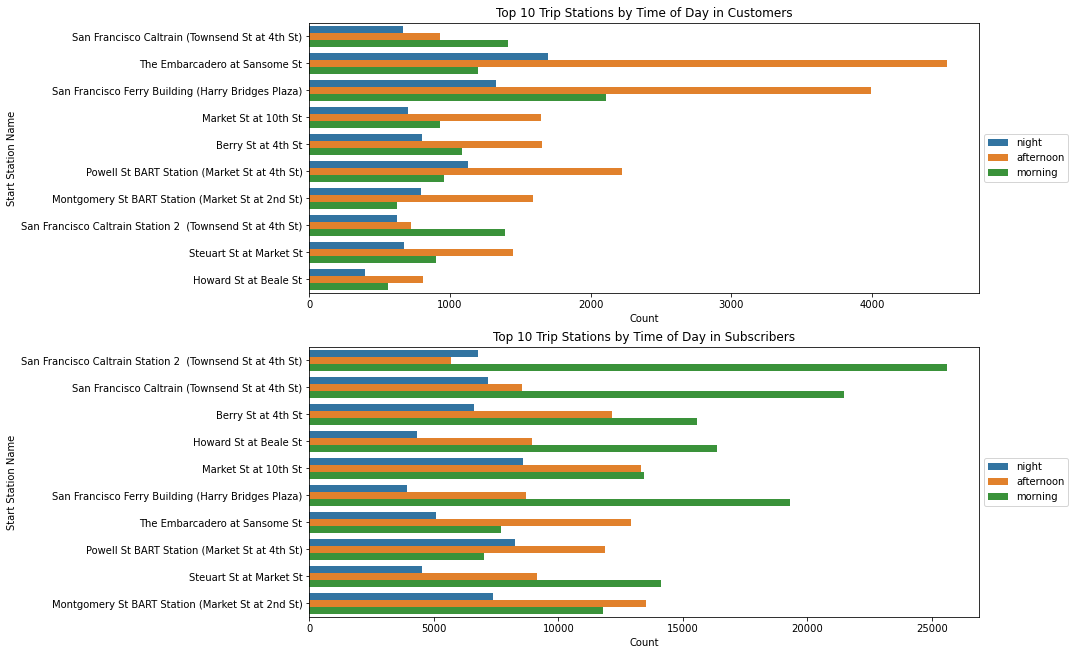

In [48]:
# 1. 3 categorical variables using countplot: time of day: morning, afternoon, night between customers and subscribers
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(top=0.95)

fig.add_subplot(2, 1, 1)
sb.countplot(data=df_customers, y='start_station_name', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day in Customers')
plt.xlabel('Count')
plt.ylabel('Start Station Name')

fig.add_subplot(2, 1, 2)
sb.countplot(data=df_subscribers, y='start_station_name', hue='Day_parts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top 10 Trip Stations by Time of Day in Subscribers')
plt.xlabel('Count')
plt.ylabel('Start Station Name');

## How many FordGoBike users weekly, and what their ages? <br />

The age interval between 31 and 40 is the highest usage of the bikes during weekdays. Surprisingly, the second-highest age interval is between 41 and 50, whereas the ages between 20 and 30 are the third.

In [8]:
import calendar
# we need to add column containing the day parts.
df_temp= df_locations_Top10.copy()
#df_temp['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df_temp.loc[:,'age_interval'] = '19-30'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 30) & (df_temp.loc[:,'member_age'] <=40 )] = '31-40'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 40) & (df_temp.loc[:,'member_age'] <=50 )] = '41-50'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 50) & (df_temp.loc[:,'member_age'] <=60 )] = '51-60'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 60) & (df_temp.loc[:,'member_age'] <=70 )] = '61-70'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 70) & (df_temp.loc[:,'member_age'] <=80 )] = '71-80'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 80) & (df_temp.loc[:,'member_age'] <=90 )] = '81-90'
df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 90) & (df_temp.loc[:,'member_age'] <=100 )] = '90-100'

df_temp.loc[:,'Start_Day_of_Week'] = df_temp.loc[:,'Start_Day_of_Week'].apply(lambda x: calendar.day_abbr[x])
df_temp.loc[:,'Start_Day_of_Week'] = pd.Categorical(df_temp.loc[:,'Start_Day_of_Week'], 
                                               categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                               ordered=True)




<ipython-input-8-ec88846f18ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 30) & (df_temp.loc[:,'member_age'] <=40 )] = '31-40'
<ipython-input-8-ec88846f18ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:,'age_interval'][(df_temp.loc[:,'member_age'] > 40) & (df_temp.loc[:,'member_age'] <=50 )] = '41-50'
<ipython-input-8-ec88846f18ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

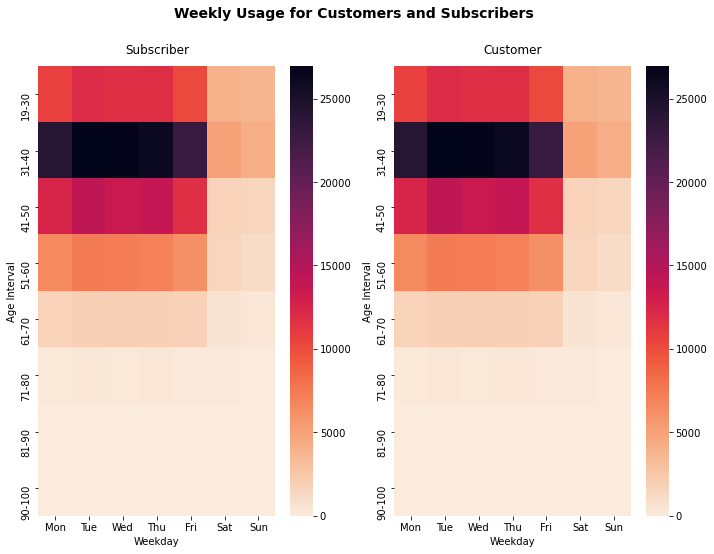

In [9]:
plt.figure(figsize=[ 11.69, 8.27])

plt.suptitle('Weekly Usage for Customers and Subscribers', fontsize=14, fontweight='semibold')

# heatmap for subscribers
plt.subplot(1, 2, 1)
df_subscriber =  df_temp.query('user_type == "Subscriber"').groupby(["age_interval", "Start_Day_of_Week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("age_interval", "Start_Day_of_Week", "bike_id")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Age Interval');


# heatmap for customers
plt.subplot(1, 2, 2)
df_customer =  df_temp.query('user_type == "Subscriber"').groupby(["age_interval", "Start_Day_of_Week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("age_interval", "Start_Day_of_Week", "bike_id")
sb.heatmap(df_subscriber, cmap="rocket_r")


plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Age Interval');

## Conclusion <br />

The use of bicycles for Ford GoBikes is a more popular activity in the summer season. Usually, tourists or occasional riders who want to enjoy summer use the bike system. Subscribers seem most of them are workers as their ages fall between 20-45, and their usage in the morning is more than in the afternoon. The month of February is the highest usage of the system, and we suggest more investigation for the source of data to confirm credibility. The ratio of customers biking for age interval 19-30 is more significant than the subscriber's ratio. Also, the subscriber's ratio for age interval 31 – 60 is bigger than customers'.  The top 10 stations in the number of users count are all in the same area where the distance between any two stations won't exceed 1.2 miles! See the map below. We guess that it is crowded area and users use the system to beat traffic and the stress of commuting.

<img src="San_Francisco_area.jpg" width="600" height="600">